In [2]:
!pip install transformers datasets scikit-learn torch matplotlib --quiet

import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn # Import torch.nn module
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler, BertForSequenceClassification
from torch.optim import AdamW  # ganti ini
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 933.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.2 MB/s eta 0:00:00


In [4]:
df= pd.read_csv("df_berlabel_part5_oversampled.csv")
df.head()

,hasil_stemming,dominant_emotion
0,"['iya', 'sana', 'bukan', 'tempat', 'rekomendas...",anger
1,"['mohon', 'kasung', 'bawa', 'aku', 'korea', 'k...",anger
2,"['sepak', 'bola', 'muda', 'kita', 'rela', 'kab...",anticipation
3,"['thought', 'hes', 'wni', 'kaburajadulu', 'nya...",trust
4,"['memang', 'kaburajadulu', 'bukan', 'buat', 's...",anticipation


In [5]:
df['hasil_stemming_str'] = df['hasil_stemming'].apply(str)

In [6]:
df.head()

,hasil_stemming,dominant_emotion,hasil_stemming_str
0,"['iya', 'sana', 'bukan', 'tempat', 'rekomendas...",anger,"['iya', 'sana', 'bukan', 'tempat', 'rekomendas..."
1,"['mohon', 'kasung', 'bawa', 'aku', 'korea', 'k...",anger,"['mohon', 'kasung', 'bawa', 'aku', 'korea', 'k..."
2,"['sepak', 'bola', 'muda', 'kita', 'rela', 'kab...",anticipation,"['sepak', 'bola', 'muda', 'kita', 'rela', 'kab..."
3,"['thought', 'hes', 'wni', 'kaburajadulu', 'nya...",trust,"['thought', 'hes', 'wni', 'kaburajadulu', 'nya..."
4,"['memang', 'kaburajadulu', 'bukan', 'buat', 's...",anticipation,"['memang', 'kaburajadulu', 'bukan', 'buat', 's..."


In [7]:
df = df.drop(columns=["hasil_stemming"])

In [8]:
df.head()

,dominant_emotion,hasil_stemming_str
0,anger,"['iya', 'sana', 'bukan', 'tempat', 'rekomendas..."
1,anger,"['mohon', 'kasung', 'bawa', 'aku', 'korea', 'k..."
2,anticipation,"['sepak', 'bola', 'muda', 'kita', 'rela', 'kab..."
3,trust,"['thought', 'hes', 'wni', 'kaburajadulu', 'nya..."
4,anticipation,"['memang', 'kaburajadulu', 'bukan', 'buat', 's..."


In [9]:
df = df[["hasil_stemming_str", "dominant_emotion"]]

In [10]:
df.head()

,hasil_stemming_str,dominant_emotion
0,"['iya', 'sana', 'bukan', 'tempat', 'rekomendas...",anger
1,"['mohon', 'kasung', 'bawa', 'aku', 'korea', 'k...",anger
2,"['sepak', 'bola', 'muda', 'kita', 'rela', 'kab...",anticipation
3,"['thought', 'hes', 'wni', 'kaburajadulu', 'nya...",trust
4,"['memang', 'kaburajadulu', 'bukan', 'buat', 's...",anticipation


In [11]:
# Ubah string list menjadi string biasa
df['hasil_stemming_str'] = df['hasil_stemming_str'].apply(ast.literal_eval)
df['hasil_stemming_str'] = df['hasil_stemming_str'].apply(lambda x: ' '.join(x))

In [12]:
df.head()

,hasil_stemming_str,dominant_emotion
0,iya sana bukan tempat rekomendasi buat kaburaj...,anger
1,mohon kasung bawa aku korea kaburajadulu,anger
2,sepak bola muda kita rela kaburajadulu demi ke...,anticipation
3,thought hes wni kaburajadulu nyata bule benera...,trust
4,memang kaburajadulu bukan buat semua orang ben...,anticipation


In [13]:
# 2. Label Encoding
# =========================
le = LabelEncoder()
df['label'] = le.fit_transform(df['dominant_emotion'])

In [14]:
# Cek jumlah tiap label
label_counts = df['label'].value_counts()
print("Jumlah data per label:\n", label_counts)

# Hapus label yang jumlahnya < 2
labels_to_remove = label_counts[label_counts < 2].index
if len(labels_to_remove) > 0:
    print("\nLabel yang dihapus karena kurang dari 2 data:", list(labels_to_remove))
    df = df[~df['label'].isin(labels_to_remove)]

Jumlah data per label:
 label
0    553
1    553
8    553
4    553
6    553
2    553
3    553
7    553
5    553
Name: count, dtype: int64


In [15]:
# # 3. Split Data
# # =========================
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['hasil_stemming_str'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, test_size=0.1, random_state=42, stratify=train_labels
)

In [16]:
# 4. Tokenisasi IndoBERT
# =========================
model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [17]:
class IndoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

In [18]:
train_dataset = IndoBERTDataset(train_texts, train_labels, tokenizer)
val_dataset = IndoBERTDataset(val_texts, val_labels, tokenizer)
test_dataset = IndoBERTDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

In [19]:
# =========================
# 5. Model IndoBERT
# =========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))
model.to(device)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [20]:
learning_rate = 2e-5
weight_decay = 0.01
patience = 2  # early stopping patience
best_val_loss = float('inf')
num_epochs = 3
epochs_no_improve = 0

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [21]:
# # 7. Training Loop

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    total_train_loss = 0
    train_preds, train_labels = [], []

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_train_loss += loss.item()
        train_preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        train_labels.extend(batch['labels'].cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    total_val_loss = 0
    val_preds, val_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            total_val_loss += outputs.loss.item()
            val_preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
            val_labels.extend(batch['labels'].cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} "
          f"| Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pt")  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break


Epoch 1/3: 100%|██████████| 224/224 [01:19<00:00,  2.81it/s]


Epoch 1 | Train Loss: 0.9864 | Val Loss: 0.4425 | Train Acc: 0.6616 | Val Acc: 0.8622


Epoch 2/3: 100%|██████████| 224/224 [01:19<00:00,  2.81it/s]


Epoch 2 | Train Loss: 0.2427 | Val Loss: 0.2306 | Train Acc: 0.9341 | Val Acc: 0.9248


Epoch 3/3: 100%|██████████| 224/224 [01:19<00:00,  2.81it/s]


Epoch 3 | Train Loss: 0.0836 | Val Loss: 0.1741 | Train Acc: 0.9858 | Val Acc: 0.9474


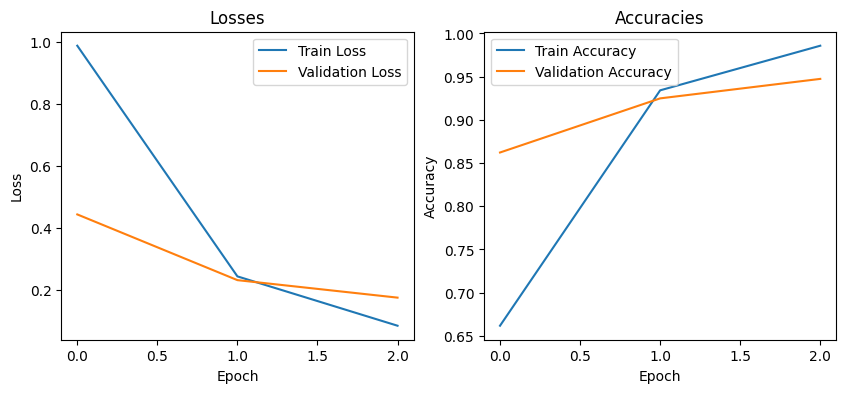

In [22]:
# Plot metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Losses")

plt.subplot(1,2,2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracies")

plt.show()

Total Accuracy: 94.18%


Classification Report:
              precision    recall  f1-score   support

       anger       0.96      0.85      0.90       111
anticipation       0.81      0.83      0.82       110
     disgust       0.97      1.00      0.99       111
        fear       0.99      1.00      1.00       111
         joy       0.96      0.96      0.96       111
     neutral       1.00      1.00      1.00       110
     sadness       0.94      0.98      0.96       111
    surprise       1.00      1.00      1.00       110
       trust       0.84      0.86      0.85       111

    accuracy                           0.94       996
   macro avg       0.94      0.94      0.94       996
weighted avg       0.94      0.94      0.94       996



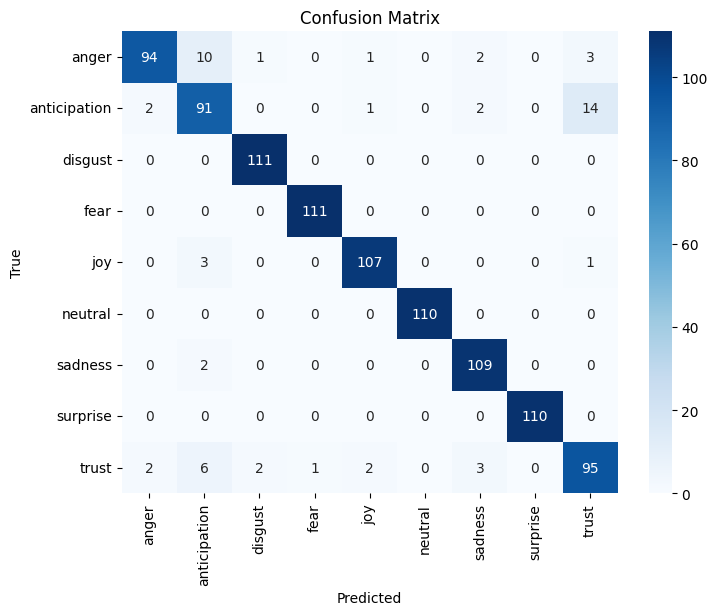

In [23]:
# Evaluate on Test Set
model.eval()
preds, labels = [], []
with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        labels.extend(batch['labels'].cpu().numpy())

accuracy = accuracy_score(labels, preds)
print(f"Total Accuracy: {accuracy:.2%}\n")  # format persen dengan 2 angka di belakang koma
print("\nClassification Report:")
# Get unique labels from predictions and true labels
unique_labels = sorted(list(set(labels) | set(preds)))
print(classification_report(labels, preds, target_names=le.classes_, labels=unique_labels))

cm = confusion_matrix(labels, preds, labels=unique_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[le.classes_[i] for i in unique_labels], yticklabels=[le.classes_[i] for i in unique_labels])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

              precision    recall  f1-score   support

       anger       0.76      0.81      0.78       116
anticipation       0.49      0.67      0.57        64
     disgust       0.00      0.00      0.00         5
        fear       0.00      0.00      0.00        14
         joy       0.71      0.21      0.32        24
     neutral       0.00      0.00      0.00         0
     sadness       0.75      0.80      0.77        30
    surprise       0.00      0.00      0.00         0
       trust       0.39      0.40      0.40        47

    accuracy                           0.62       300
   macro avg       0.34      0.32      0.32       300
weighted avg       0.59      0.62      0.59       300



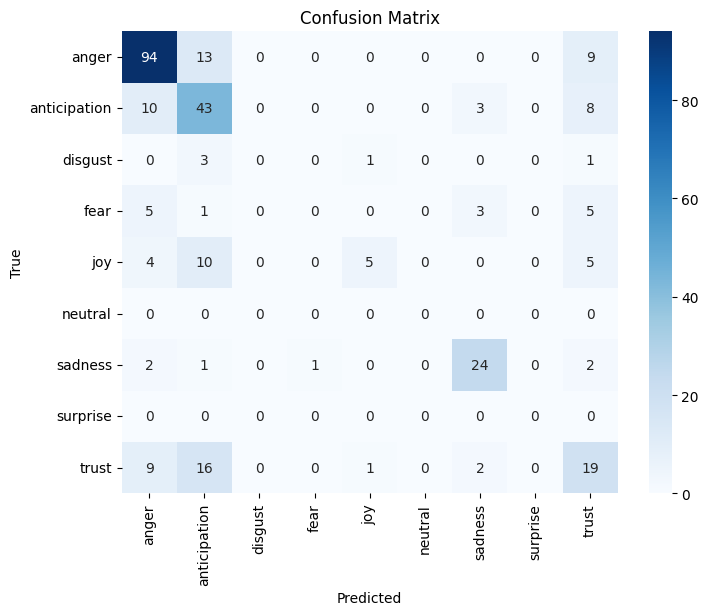

In [ ]:
# Buat list label yang mau ditampilkan (hapus 'netral')
labels_to_keep = [lbl for lbl in le.classes_ if lbl.lower() != "netral"]
labels_index_to_keep = [i for i, lbl in enumerate(le.classes_) if lbl.lower() != "netral"]

# Classification Report
print(classification_report(
    labels,
    preds,
    target_names=labels_to_keep,
    labels=labels_index_to_keep
))

# Confusion Matrix
cm = confusion_matrix(labels, preds, labels=labels_index_to_keep)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_to_keep,
            yticklabels=labels_to_keep)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [24]:
# Create a DataFrame with actual vs predicted labels
results_df = pd.DataFrame({'Text': test_texts.reset_index(drop=True),
                           'Actual Label': [le.classes_[i] for i in labels],
                           'Predicted Label': [le.classes_[i] for i in preds]})

# Display the first few rows of the DataFrame
print("\nActual vs Predicted Labels:")
display(results_df.head(20))


Actual vs Predicted Labels:


,Text,Actual Label,Predicted Label
0,salam jaring dagang manusia china darat benua ...,surprise,surprise
1,jeh tidak sopan viralvideos videolucu lucu kab...,disgust,disgust
2,lord kaburajadulu,anger,anger
3,kaburajadulu jalur satwa,anger,anticipation
4,kaburajadulu baik negara mana,anticipation,anticipation
5,kaburajadulu tomoro deket rumah soal kabur dul...,trust,trust
6,iya makanya asa gua indonesiagelap kaburajadul...,trust,trust
7,semoga tahun bisa kaburajadulu,anticipation,anticipation
8,klub belum memang problematik mayoritas main l...,joy,joy
9,jadi ingin kaburajadulu negara orang sipil tid...,sadness,sadness


In [35]:
def predict_emotion(text, model, tokenizer, label_encoder, device, max_len=128):
    model.eval()
    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)[0] # Get probabilities

    predicted_class_id = torch.argmax(probabilities).item()
    predicted_emotion = label_encoder.inverse_transform([predicted_class_id])[0]

    # Get confidence score for the predicted emotion
    confidence = probabilities[predicted_class_id].item()

    return predicted_emotion, confidence, probabilities

# Example usage
example_text = "kabur ke negara mana ya"
predicted_emotion, confidence, probabilities = predict_emotion(example_text, model, tokenizer, le, device)
print(f"The predicted emotion for the text '{example_text}' is: {predicted_emotion} with a confidence of {confidence:.4f}")

# Optional: Display probabilities for all emotions
print("Probabilities for all emotions:")
for i, prob in enumerate(probabilities):
    print(f"  {le.classes_[i]}: {prob.item():.4f}")

example_text_2 = "kabur doang ga dapat kerja"
predicted_emotion_2, confidence_2, probabilities_2 = predict_emotion(example_text_2, model, tokenizer, le, device)
print(f"\nThe predicted emotion for the text '{example_text_2}' is: {predicted_emotion_2} with a confidence of {confidence_2:.4f}")

# Optional: Display probabilities for all emotions
print("Probabilities for all emotions:")
for i, prob in enumerate(probabilities_2):
    print(f"  {le.classes_[i]}: {prob.item():.4f}")

example_text_3 = "semoga setelah lulus bisa kabur ke luar negri"
predicted_emotion_3, confidence_3, probabilities_3 = predict_emotion(example_text_3, model, tokenizer, le, device)
print(f"\nThe predicted emotion for the text '{example_text_3}' is: {predicted_emotion_3} with a confidence of {confidence_3:.4f}")

# Optional: Display probabilities for all emotions
print("Probabilities for all emotions:")
for i, prob in enumerate(probabilities_3):
    print(f"  {le.classes_[i]}: {prob.item():.4f}")

The predicted emotion for the text 'kabur ke negara mana ya' is: trust with a confidence of 0.6177
Probabilities for all emotions:
  anger: 0.2927
  anticipation: 0.0439
  disgust: 0.0021
  fear: 0.0148
  joy: 0.0040
  neutral: 0.0063
  sadness: 0.0126
  surprise: 0.0060
  trust: 0.6177

The predicted emotion for the text 'kabur doang ga dapat kerja' is: anger with a confidence of 0.7405
Probabilities for all emotions:
  anger: 0.7405
  anticipation: 0.0165
  disgust: 0.0026
  fear: 0.0144
  joy: 0.0031
  neutral: 0.0031
  sadness: 0.0166
  surprise: 0.0053
  trust: 0.1979

The predicted emotion for the text 'semoga setelah lulus bisa kabur ke luar negri' is: anticipation with a confidence of 0.9437
Probabilities for all emotions:
  anger: 0.0272
  anticipation: 0.9437
  disgust: 0.0017
  fear: 0.0016
  joy: 0.0046
  neutral: 0.0024
  sadness: 0.0013
  surprise: 0.0015
  trust: 0.0160


In [ ]:
# from sklearn.metrics import classification_report

# # Load best model sebelum evaluasi
# model.load_state_dict(torch.load("best_model.pt"))
# model.eval()

# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for batch in val_loader:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         outputs = model(**batch)
#         preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
#         labels = batch['labels'].cpu().numpy()

#         all_preds.extend(preds)
#         all_labels.extend(labels)

# # Classification Report
# print("\nClassification Report (Validation Set):")
# unique_labels = sorted(list(set(all_labels) | set(all_preds)))
# print(classification_report(all_labels, all_preds, target_names=[le.classes_[i] for i in unique_labels], labels=unique_labels))


Classification Report (Validation Set):
              precision    recall  f1-score   support

       anger       0.83      0.56      0.67         9
anticipation       0.63      0.65      0.64        26
     disgust       1.00      0.17      0.29         6
        fear       0.50      0.50      0.50         6
         joy       1.00      0.29      0.44         7
     neutral       0.77      0.97      0.86        38
     sadness       0.73      0.85      0.79        13
       trust       0.40      0.40      0.40        15

    accuracy                           0.68       120
   macro avg       0.73      0.55      0.57       120
weighted avg       0.71      0.68      0.66       120



In [ ]:
# # 8. Evaluasi
# # =========================
# model.eval()
# preds, labels = [], []
# with torch.no_grad():
#     for batch in test_loader:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         outputs = model(**batch)
#         preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
#         labels.extend(batch['labels'].cpu().numpy())

# print("\nClassification Report:")
# # Get unique labels from predictions and true labels
# unique_labels = sorted(list(set(labels) | set(preds)))
# print(classification_report(labels, preds, target_names=le.classes_, labels=unique_labels))

# cm = confusion_matrix(labels, preds, labels=unique_labels)
# plt.figure(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[le.classes_[i] for i in unique_labels], yticklabels=[le.classes_[i] for i in unique_labels])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.show()


=== Confusion Matrix ===
          Pred_0  Pred_1  Pred_2  Pred_3
Actual_0       0       0       0       0
Actual_1       0       0       0       0
Actual_2       0       0       0       0
Actual_3       0       0       0       0
